# Random Forest Classification from SKLearn
Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees. In the case of a classification problem, the final output is taken by using the majority voting classifier. In the case of a regression problem, the final output is the mean of all the outputs.<br>
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.<br>
Random Forest work on three functions :-<br>
(1) Boot Strapping<br>
(2) Random Subspace<br>
(3) Prediction
# ----------------------------------------------------------------------------------------------------------------------------------------------------------
## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score, confusion_matrix

# ----------------------------------------------------------------------------------------------------------------------------------------------------------
### Calling Data
Data is call for work. The Columns are selected here is according to the WINE QUALITY DATASET of RED WINE find on Kaggle(www.kaggle.com).<br>
Creating Dataset from original columns from the dataset so that you won't face any trouble regarding the dataset. I use Wine Quality Dataset to train model and predict whether the wine is having good or bad Quality.

In [2]:
cancer_df = pd.read_csv('./Dataset/Breast Cancer Dataset/Breast_Cancer_Data.csv')
cancer_df['diagnosis'].replace(['B', 'M'], [0, 1], inplace = True)
cancer_df['label'] = cancer_df.diagnosis
cancer_df.drop([cancer_df.columns[0], cancer_df.columns[1], cancer_df.columns[32]], axis = 1, inplace = True)
cancer_data = cancer_df.iloc[:, 1:3].values
cancer_label = cancer_df.iloc[:, -1].values

### Train Test Split
Splitting the dataset into the Training set and Test set

In [3]:
train_cancer, test_cancer, train_label, test_label = train_test_split(cancer_data, cancer_label, test_size = 0.25, random_state = 0)

### Normalising the data
Scaling the features.<br>
The scaling is also know as standardisation/normalisation. Standardization is a process for making a dataset fit for the training of the model. In this prosess we make a dataset whose value lies between zero mean and one standard deviation. The Data Comming out from this process is smooth for the curves and fitting a model.

In [4]:
sc = StandardScaler()
train_cancer = sc.fit_transform(train_cancer)
test_cancer = sc.transform(test_cancer)

### Random Forest Algorithm

In [5]:
cancer_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
cancer_forest.fit(train_cancer, train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Accuracy Prediction
#### Training Data

In [6]:
predict_cancer_train = cancer_forest.predict(train_cancer)
accuracy_cancer_train = accuracy_score(train_label, predict_cancer_train)
print("--------------------------------------------------------\n")
print('Accuracy over Breast Cancer Training Data : {}'.format(accuracy_cancer_train))
print("\n--------------------------------------------------------")

--------------------------------------------------------

Accuracy over Breast Cancer Training Data : 0.9835680751173709

--------------------------------------------------------


#### Testing Data

In [7]:
predict_cancer_test = cancer_forest.predict(test_cancer)
accuracy_cancer_test = accuracy_score(test_label, predict_cancer_test)
print("--------------------------------------------------------\n")
print('Accuracy over Breast Cancer Training Data : {}'.format(accuracy_cancer_test))
print("\n--------------------------------------------------------")

--------------------------------------------------------

Accuracy over Breast Cancer Training Data : 0.8881118881118881

--------------------------------------------------------


# ----------------------------------------------------------------------------------------------------------------------------------------------------------
### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.<br>
##### Precision means how much accurately our model predicts or we can say how much positive idenfied label actually correct.<br>
$$Precision = \frac{True Positive}{True Positive + False Positive}$$
##### Recall means how much positive identified label predicted correctly.<br>
$$Recall = \frac{True Positive}{True Positive + False Negative}$$

In [8]:
def confusion_matrix_with_plot(model,testing_data,testing_label,predict_label):
    tn,fp,fn,tp = confusion_matrix(testing_label,predict_label).ravel()
    plot_confusion_matrix(model,testing_data,testing_label)
    precision = tp/(tp+fp)*100
    recall = tp/(tp+fn)*100
    return print("----------------------------\nTrue Positive : ",tp,"\nFalse Positive : ",fp,"\nTrue Negative : ",
                 tn,"\nFalse Negative : ",fn,"\n----------------------------\nPrecision : ",
                 precision,"\nRecall : ",recall,"\n----------------------------")

#### Confucion Matrix over Training Data

----------------------------
True Positive :  152 
False Positive :  0 
True Negative :  267 
False Negative :  7 
----------------------------
Precision :  100.0 
Recall :  95.59748427672956 
----------------------------


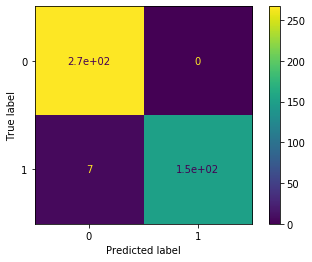

In [9]:
confusion_matrix_with_plot(cancer_forest,train_cancer,train_label,predict_cancer_train)

#### Confusion Matrix over Testing Data

----------------------------
True Positive :  45 
False Positive :  8 
True Negative :  82 
False Negative :  8 
----------------------------
Precision :  84.90566037735849 
Recall :  84.90566037735849 
----------------------------


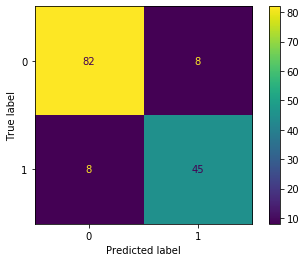

In [10]:
confusion_matrix_with_plot(cancer_forest,test_cancer,test_label,predict_cancer_test)

# ----------------------------------------------------------------------------------------------------------------------------------------------------------
### Precision-Recall Curve
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

#### Precision-Recall Curve over training data

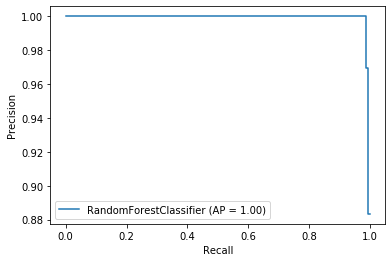

In [11]:
plot_precision_recall_curve(cancer_forest,train_cancer,train_label)

#### Precision-Recall Curve over testing data

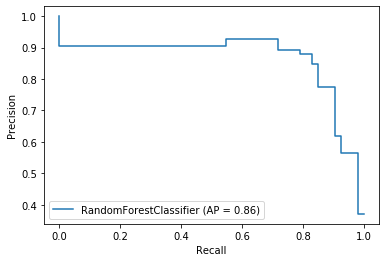

In [12]:
plot_precision_recall_curve(cancer_forest,test_cancer,test_label)

### Plot ROC Curve Function
Preparing to plot ROC curve. The function plot the ROC Curve from the list containing the value of true positive and false positive rate. A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings.

#### Plotting ROC Curve for Training Data

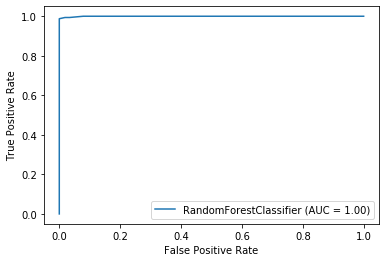

In [13]:
plot_roc_curve(cancer_forest,train_cancer,train_label)

#### Plotting ROC Curve Testing Data

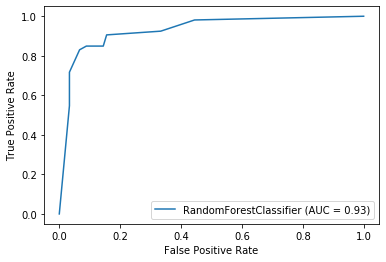

In [14]:
plot_roc_curve(cancer_forest,test_cancer,test_label)

### Visualising result

In [15]:
def ploting_colormap(model, data, labels):
    X_set, y_set = data, labels
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Random Forest Classification (Training set)')
    plt.xlabel(':Label')
    plt.ylabel('Feature')
    plt.legend()
    plt.show()

#### The Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


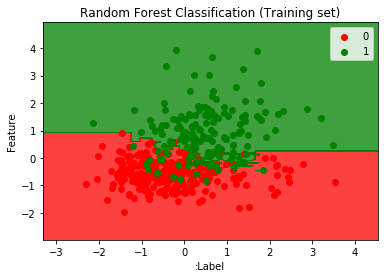

In [16]:
ploting_colormap(cancer_forest,train_cancer,train_label)

#### The Testing set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


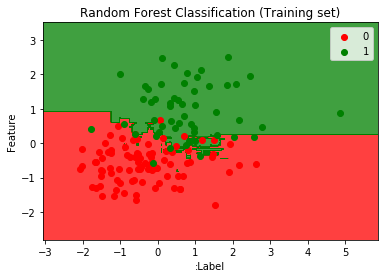

In [17]:
ploting_colormap(cancer_forest,test_cancer,test_label)